### Descenso de gradiente

En la lección anterior vimos que "aprender" significa encontrar valores de los parámetros del modelo que minimizan la función de pérdida. Pero ¿cómo se obtienen esos valores?

Supongo que todos tenemos la idea vaga de que para obtener el mínimo de una función debemos calcular la función derivada y resolver la ecuación resultante de igualarla a $0$. En este curso no tenemos que saber derivar, pero sí es importante entender el concepto de derivada y cómo se aplica en el descenso de gradiente.

**¿Qué es la derivada?**

La derivada de una función en un punto es la pendiente de la tangente a la curva en ese punto. En otras palabras, es la tasa de cambio de la función en ese punto. Si la derivada es positiva, significa que la función está aumentando; si es negativa, significa que está disminuyendo. Es decir, la derivada nos dice si la función está subiendo o bajando en un punto dado. Esto nos puede servir para encontrar el mínimo de una función, ya que cuando la derivada es cero, significa que la función ha alcanzado un punto crítico (mínimo, máximo o punto de inflexión).

En resumen, la derivada es la relación de cambio de $y$ respecto de $x$ en un punto dado. Veámoslo con un ejemplo:

Supongamos que quiero calcular la derivada de la función $f(x) = x^2$ en el punto $x = 2$. Todos recordamos que la función derivada es $f'(x) = 2x$. Entonces, al evaluar la derivada en $x = 2$, obtenemos $f'(2) = 4$. Pero, ¿qué significa esto? Significa que si me muevo un poco a la derecha de $x = 2$, la función $f(x)$ aumentará aproximadamente cuatro veces lo que haya aumentado $x$. Si me muevo un poco a la izquierda, disminuirá aproximadamente cuatro veces lo que lo haga $x$. Por ejemplo, suponiendo que me muevo $0.1$ unidades a la derecha, el nuevo valor de $x$ es $2.1$, y el nuevo valor de $f(x)$ es $f(2.1) = 4.41$. La diferencia entre estos dos valores es $4.41 - 4 = 0.41$. Si dividimos esta diferencia entre el cambio en $x$, que es $0.1$, obtenemos una pendiente de aproximadamente $4.1$. Ese valor no es exactamente $4.0$, pero eso es porque hemos tomado un incremento de $x$ muy grande. Cuando más pequeño sea el incremento, más cerca estará el resultado del valor real de la derivada. Si tomamos un incremento infinitesimal, obtendremos exactamente el valor de la derivada.

El párrafo anterior es todo lo que necesitamos saber de derivadas. Podemos entender el concepto de derivación sin necesidad de saber derivar.

Volvamos al principio. Queremos calcular los parámetros del modelo que minimizan la función de pérdida. Es decir, debemos derivar la función de pérdida respecto a cada uno de los parámetros del modelo. Entonces, ya no hay una única derivada sino para cada parámetro. Por ejemplo, en la regresión lineal simple de la lección anterior, la función de pérdida es la suma de los errores al cuadrado:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Dónde:

$\hat{y}_i = m \cdot x_i + b$

Sustituyendo $\hat{y}_i$ en la función de pérdida, obtenemos:

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m \cdot x_i + b))^2$


Entonces, debemos derivar la función de pérdida respecto a $m$ y $b$ e igualar a cero:

$$
\left.
\begin{aligned}
\frac{\partial MSE}{\partial m} = 0 \\
\frac{\partial MSE}{\partial b} = 0
\end{aligned}
\right\}
$$

Lo anterior forma un sistema de ecuaciones. En este curso no nos interesa saber cómo se deriva ni cómo se resuelve un sistema de ecuaciones. Lo importante es entender que no hay un único valor de la derivada de la función de pérdida, sino un valor de la derivada para cada parámetro del modelo. El conjunto de valores de la derivada es un véctor que apunta en la dirección de mayor aumento de la función de pérdida. A ese véctor se le denomina **gradiente**. Ya conocemos una de las palabras que necesitamos entender. 

Si seguimos la dirección del gradiente, la función de pérdida aumentará. Por lo tanto, si queremos minimizar la función de pérdida, debemos movernos en la dirección opuesta a el gradiente. Esto se conoce como descenso de gradiente.

En el caso de la regresión lineal (simple o múltiple) y función de pérdida $MSE$, el valor mínimo de la función de pérdida se puede obtener analíticamente resolviendo el sistema de ecuaciones anterior. Esto es así porque la función de pérdida es parabólica (en realidad, hiperparabólica ya que tenemos varios parámetros). Pero en otros muchos modelos, la solución analítica no es posible. Aquí es donde entra en juego el descenso de gradiente. 

Podemos utilizar una analogía para entender el descenso de gradiente. Imagina que el avión en el que viajabas se estrella en una cordillera nevada en mitad de una noche muy fría sin luna ni estrellas (sí, ya sé, el ejemplo no es muy original, pero sirve para explicar el concepto). La única forma de no morir congelados en la nieve es moverse. Pero, ¿hacia dónde? Hacia abajo, por supuesto. Pero, ¿cómo sabes hacia dónde está abajo? La linterna del móvil, aunque no ilumina mucho, te permite ver un poco el terreno. Si miras a tu alrededor, verás que el terreno tiene una pendiente. Entonces, si sigues la dirección contraría a la pendiente, bajarás. Ten en cuenta en una montaña es un plano, y por lo tanto, debes encontrar la dirección de la pendiente de cada una de las dos dimensiones. Habrá ocasiones en que llegues a un lugar donde la pendiente es cero. Si todavía hace mucho frío, tu única solución será subir un poco remontando lo que esperas que, con suerte, sea sólo una loma y podrás seguir bajando. Realmente no sé si este procedimiento te permitiría salvar la vida. En cualquier caso, es una buena forma de entender el descenso de gradiente.

<p align="center">
    <img src="../imgs/montana.png" width="500"/>
</p>

Voy a definir el concepto para luego explicarlo con más detenimiento. El **descenso de gradiente** es un algoritmo iterativo que nos permite encontrar los valores óptimos de los parámetros del modelo. En cada iteración, calculamos el gradiente de la función de pérdida y actualizamos los parámetros del modelo en la dirección opuesta al gradiente. Esto se puede expresar matemáticamente como:

$$
\Theta = \Theta - \alpha \cdot \nabla J(\Theta) \tag{1}
$$

Dónde:
- $\Theta$ es el vector de los parámetros del modelo (en nuestro caso, $m$ y $b$).
- $\alpha$ es un la tasa de aprendizaje (learning rate), que controla el tamaño del paso que damos en cada iteración.
- $J(\Theta)$ es la función de pérdida.
- $\nabla J(\Theta)$ es el gradiente de la función de pérdida respecto a los parámetros del modelo.

Veamos, $\Theta$ sería el punto de la montaña dónde estamos. Ahora tenemos que averiguar como ir hacia abajo. Una forma sencilla de hacerlo sería evaluar la función de pérdida desplazando un poco el punto en cada dirección. Por ejemplo, si estamos en el punto $(\theta_0,\theta_1)$ (donde $\theta_0$ y $\theta_1$ son los parámetros a estimar), podemos calcular la función de pérdida en los puntos $(\theta_0 + \epsilon, \theta_1)$, $(\theta_0 - \epsilon, \theta_1)$, $(\theta_0 , \theta_1 + \epsilon)$, $ (\theta_0 , \theta_1 - \epsilon)$, $ (\theta_0 + \epsilon, \theta_1 + \epsilon)$, $ (\theta_0 - \epsilon, \theta_1 - \epsilon)$, $ (\theta_0 + \epsilon, \theta_1 - \epsilon)$ y $ (\theta_0 - \epsilon, \theta_1 + \epsilon)$,   donde $\epsilon$ es un pequeño número positivo. Luego, comparamos los valores de la función de pérdida en esos puntos con el valor de la función de pérdida en el punto actual. Si el valor de la función de pérdida es menor en uno de los nuevos puntos que en el actual, significa que estamos bajando. Entonces, podemos movernos en la dirección con el punto de menor evaluación de la función de pérdida. Si ninguno de los puntos tiene un valor menor que el actual, significa que hemos alcanzado un mínimo.

Pero aquí hay varios problemas:

* En primer lugar, ¿qué valor debe tener $\epsilon$? Si es muy pequeño, el algoritmo progresará muy lentamente. Si es muy grande, el algoritmo se puede saltar el mínimo y no converger. Además, el valor de $\epsilon$ puede ser adecuado en una dimensión, pero no en otra, ya que una dimensión puede tener unidades más grandes que la otra y la función de pérdida puede oscilar más brúscamente en una dimensión que en la otra. Incluso el valor de $\epsilon$ puede tener que ser diferente en cada iteración, ya que a veces podemos estar atravesando una zona casi plana y nos conviene un $\epsilon$ grande para salir pronto de allí y otras veces podemos estar en una zona con fuertes oscilaciones y nos conviene un $\epsilon$ pequeño para no saltarnos un mínimo. $\epsilon$ puede también que depender del valor de los parámetros ($\Theta$), ya que para evaluar la función de pérdida se multiplica $\epsilon$ por el valor concreto que tenga cada parámetro ($\theta$).
* Con ser importante, ese no es el mayor problema que nos encontramos. El mayor problema es que el número de puntos a evaluar crece exponencialmente con el número de parámetros. Si tenemos $n$ parámetros, debemos evaluar $n^3$ puntos. Por lo tanto, si tenemos 10 parámetros, debemos evaluar 1000 puntos. Si tenemos 20 parámetros, debemos evaluar 8,000 puntos. Y así sucesivamente. Hay modelos con cientos de millones de parámetros. Por lo tanto, no es posible evaluar todos los puntos posibles.
* Otro problema es que la función de pérdida puede tener muchos mínimos locales. Si el algoritmo se queda atrapado en un mínimo local, no podrá encontrar el mínimo global.
* Por último, el algoritmo puede ser muy lento, ya que en cada iteración debemos evaluar la función de pérdida en muchos puntos.

Casi todos estos problemas se resuelven utilizando el gradiente. El gradiente no sólo nos dice la dirección de la pendiente, sino que también nos dice su magnitud. Por lo tanto, podemos movernos en la dirección del gradiente y ajustar el tamaño del paso en función de la magnitud del gradiente.

Ya podemos entender la ecuación (1). En cada iteración, calculamos el gradiente de la función de pérdida respecto a los parámetros del modelo. Luego, actualizamos los parámetros del modelo en la dirección opuesta al gradiente, multiplicando el gradiente por un número positivo $\alpha$ (la tasa de aprendizaje). La tasa de aprendizaje controla el tamaño del paso que damos en cada iteración. Si es muy grande, podemos saltarnos el mínimo. Si es muy pequeña, el algoritmo puede ser muy lento. Por lo tanto, debemos elegir un valor adecuado para la tasa de aprendizaje. La tasa de aprendizaje es un ejemplo de hiperparámetro. Un **hiperparámetro** es un parámetro que no se aprende durante el entrenamiento del modelo, sino que se establece antes de comenzar el entrenamiento. Se pueden elegir varios valores de la tasa de aprendizaje y evaluar el modelo con cada uno de ellos. Luego, se elige el que mejor rendimiento tenga.

Una variante del descenso de gradiente es el **descenso de gradiente estocástico** (SGD por sus siglas en inglés). En el descenso de gradiente, calculamos el gradiente de la función de pérdida utilizando todos los datos de entrenamiento. Esto puede ser muy lento, especialmente si tenemos un gran conjunto de datos. En el descenso de gradiente estocástico, calculamos el gradiente utilizando un solo ejemplo de entrenamiento en cada iteración. Esto hace que el algoritmo sea mucho más rápido, pero también que la estimación del gradiente sea muy errática. ya que puede ocurrir que la función de pérdida sea más pequeña para un solo punto pero no para la suma de todos los puntos. En ese caso nos estaríamos moviendo en una dirección incorrecta. Es probable que al elegir otro punto al azar, en la siguiente iteración, se corrija la dirección. Sin embargo, este comportamiento errático puede ayudar al algoritmo a escapar de los mínimos locales y encontrar el mínimo global. En realidad, la variante de descenso de gradiente más usada es el **descenso de gradiente por lotes** (mini-batch gradient descent). En este caso, calculamos el gradiente utilizando un pequeño lote de ejemplos de entrenamiento en cada iteración. Esto hace que el algoritmo sea más estable que el descenso de gradiente estocástico. Además, se puede elegir el tamaño del lote para que sea el tamaño adecuado para ser procesado por la GPU, acelerando los cálculos. Por lo tanto, el descenso de gradiente por lotes es una buena opción para entrenar modelos con grandes conjuntos de datos. En la práctica, el tamaño del lote suele ser de 32, 64 o 128 ejemplos. Sin embargo, no hay una regla estricta sobre el tamaño del lote. A veces, un tamaño de lote más pequeño puede dar mejores resultados que un tamaño de lote más grande. Por lo tanto, es recomendable probar diferentes tamaños de lote y elegir el que mejor rendimiento tenga. El tamaño del lote es otro ejemplo de hiperparámetro.


### Sobreajuste y Subajuste

El sobreajuste y el subajuste son dos problemas comunes en el aprendizaje automático. El sobreajuste ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a los datos de prueba. Esto significa que el modelo tiene un rendimiento muy bueno en los datos de entrenamiento, pero un rendimiento muy malo en los datos de prueba. El subajuste ocurre cuando un modelo no se ajusta lo suficiente a los datos de entrenamiento y no captura la relación entre las variables. Esto significa que el modelo tiene un rendimiento muy malo tanto en los datos de entrenamiento como en los datos de prueba.

Los datos de entrenamiento son los datos que se utilizan para entrenar el modelo. Los datos de prueba son los datos que se utilizan para evaluar el rendimiento del modelo. Es importante tener un conjunto de datos de prueba separado para evaluar el rendimiento del modelo, ya que si evaluamos el modelo en los mismos datos que se utilizaron para entrenarlo, podemos obtener una evaluación engañosa del rendimiento del modelo.

Pongamos un ejemplo sencillo usando una sola variable predictora ($x$). La variable de respuesta ($y$) está relacionada con $x$ según un polinomio de grado 3:

$$
y = 0.5x^3 - 2x^2 + 3x + 1 + \epsilon \\
\epsilon \sim N(0, 6)
$$

En este caso, $\epsilon$ es un error aleatorio que sigue una distribución normal con media cero y varianza $6$. No es importante entender qué es una distribución normal. Pero sí que el error aleatorio es un ruido que se añade a la variable de respuesta, y que, por lo tanto, no se puede predecir.

A pesar de tener términos polinomiales, la ecuación es lineal en los parámetros. Por lo tanto, podemos utilizar la regresión lineal para ajustar el modelo. La ventaja de usar una única variable predictora es que podemos representar gráficamente los datos y ver cómo se ajusta el modelo. 

Simulamos un `dataframe` que utlice este modelo.

In [1]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_line, facet_wrap, theme_minimal, labs, theme, element_rect
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Semilla para reproducibilidad
np.random.seed(4242)

# Generar 10 valores de x uniformemente distribuidos entre -2 y 4
x = np.linspace(-2, 4, 10)
epsilon = np.random.normal(0, 6, size=10)
y = 0.5 * x**3 - 2 * x**2 + 3 * x + 1 + epsilon
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,-2.000000,-14.419393
1,-1.333333,-8.766448
2,-0.666667,-3.500715
3,0.000000,3.838413
4,0.666667,6.128612
5,1.333333,9.563524
6,2.000000,-9.357154
7,2.666667,6.470013
8,3.333333,8.663016
9,4.000000,23.630905


Ahora, ajustamos el modelo utilizado regresión lineal con polinomios de grados 0, 1, 2, 3, 4 y 9.

In [2]:
# Crear DataFrame para almacenar predicciones de cada grado
results = []
degrees = [0, 1, 2, 3, 4, 9]

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(df[['x']])
    model = LinearRegression()
    model.fit(X_poly, df['y'])
    # Crear rango fino para la curva
    x_fit = np.linspace(df['x'].min(), df['x'].max(), 100)
    X_fit_poly = poly.transform(pd.DataFrame(x_fit, columns=['x']))
    y_fit = model.predict(X_fit_poly)
    df_fit = pd.DataFrame({'x': x_fit, 'y_fit': y_fit, 'degree': f'Grado {degree}'})
    results.append(df_fit)

df_fit_all = pd.concat(results)
df_points = pd.concat([df.assign(degree=f'Grado {degree}') for degree in degrees])


Representamos gráficamente los resultados:

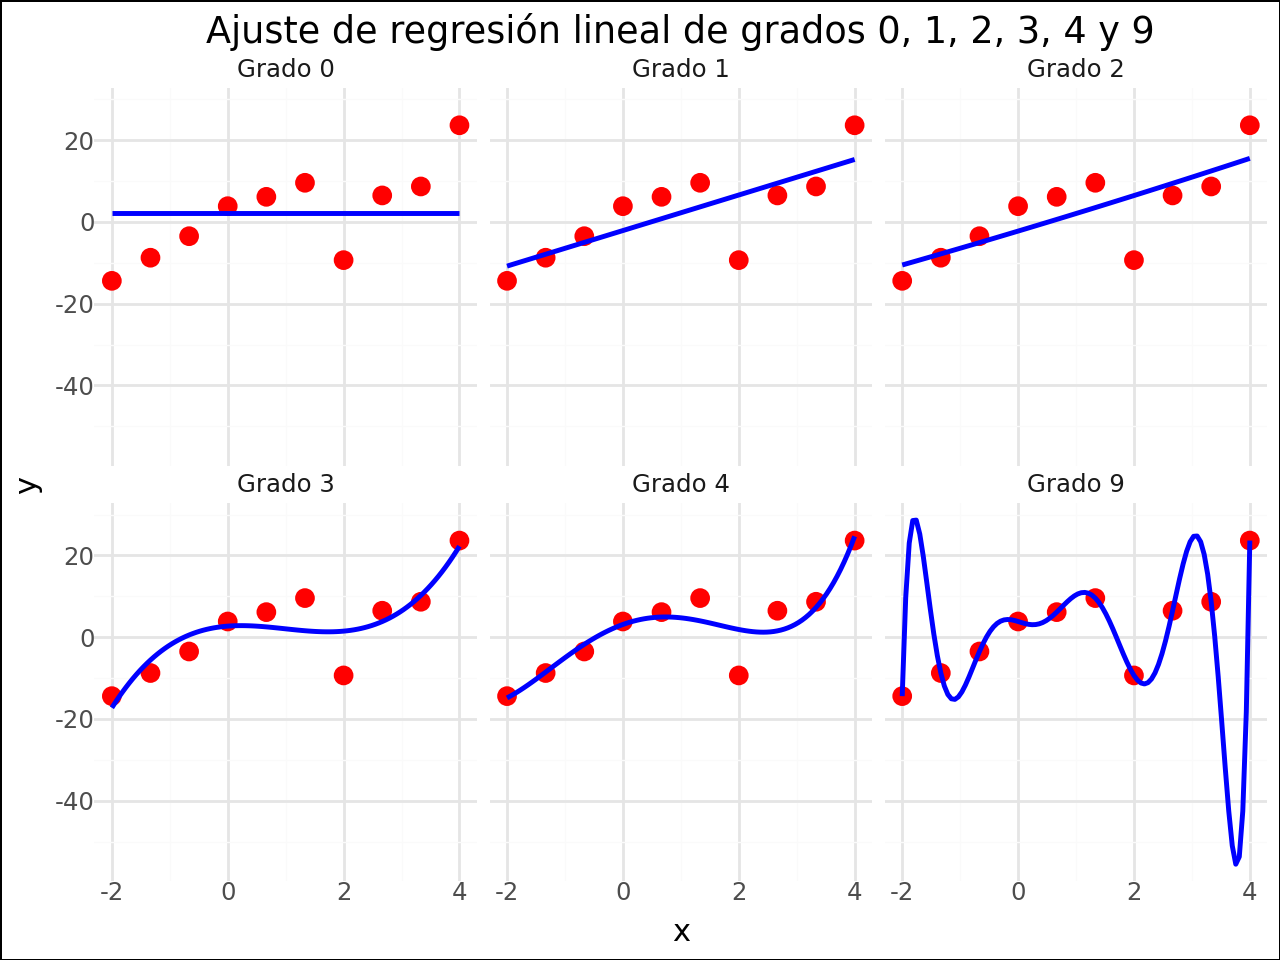

In [3]:
plot = (
    ggplot() +
    geom_point(df_points, aes(x='x', y='y'), color='red', size=3) +
    geom_line(df_fit_all, aes(x='x', y='y_fit'), color='blue', size=1) +
    facet_wrap('~degree', nrow=2, ncol=3) +
    theme_minimal() +
    theme(
        panel_background=element_rect(fill='white'),
        plot_background=element_rect(fill='white')
    ) +
    labs(title='Ajuste de regresión lineal de grados 0, 1, 2, 3, 4 y 9', x='x', y='y')
)

plot

Observamos que el modelo de grado 3 (que es el que se ha usado para simular los datos) se ajusta bien a los datos. El modelo de grado 4, es parecido y también se ajusta bastante bien. Los de grado 1 y 2, siguen la tendencia pero no capturan la forma cúbica de los datos. El problema real lo tenemos en los modelos de grado 0 y 9. El modelo de grado 0 (sólo tiene el parámetro intercepto) predice simplemente la media de los datos. Es un caso claro de subajuste (`underfitting`). El modelo de grado 9, por el contrario, se ajusta demasiado a los datos de entrenamiento incorporando a la predicción el ruido aleatorio. En este caso, el modelo tiene un rendimiento muy bueno en los datos de entrenamiento, pero tendrá un rendimiento muy malo en los datos de prueba. Este es un caso claro de sobreajuste (`overfitting`).

¿Cómo se solucionan estos problemas? Antes de plantear una solución, es importante evaluar si el modelo tiene un buen rendimiento en los datos de prueba. Por ello, se deben dividir los datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utiliza para ajustar el modelo y el conjunto de prueba se utiliza para evaluar el rendimiento del modelo. La división se puede hacer de varias formas. La más sencilla es dividir los datos en dos partes, una para entrenamiento y otra para prueba. Por ejemplo, podemos usar el 80% de los datos para entrenamiento y el 20% restante para prueba. Otra opción es usar la validación cruzada, que consiste en dividir los datos en varios subconjuntos (o "folds"). Luego, se entrena el modelo en todos los subconjuntos menos uno y se evalúa en el subconjunto restante. Este proceso se repite varias veces, cada vez utilizando un subconjunto diferente como conjunto de prueba. Al final, se promedian las métricas de rendimiento obtenidas en cada iteración. En cualquier caso, siempre se deben presentar los resultados que se han obtenido en el conjunto de prueba, nunca en el conjunto de entrenamiento.

Para evitar el subajuste podemos incorporar más variables explicativas. Para evitar el sobreajuste podemos recopilar más datos. Por ejemplo este es el ajuste al polinomio de grado 9 si aumentamos las observaciones a 1000 elementos.

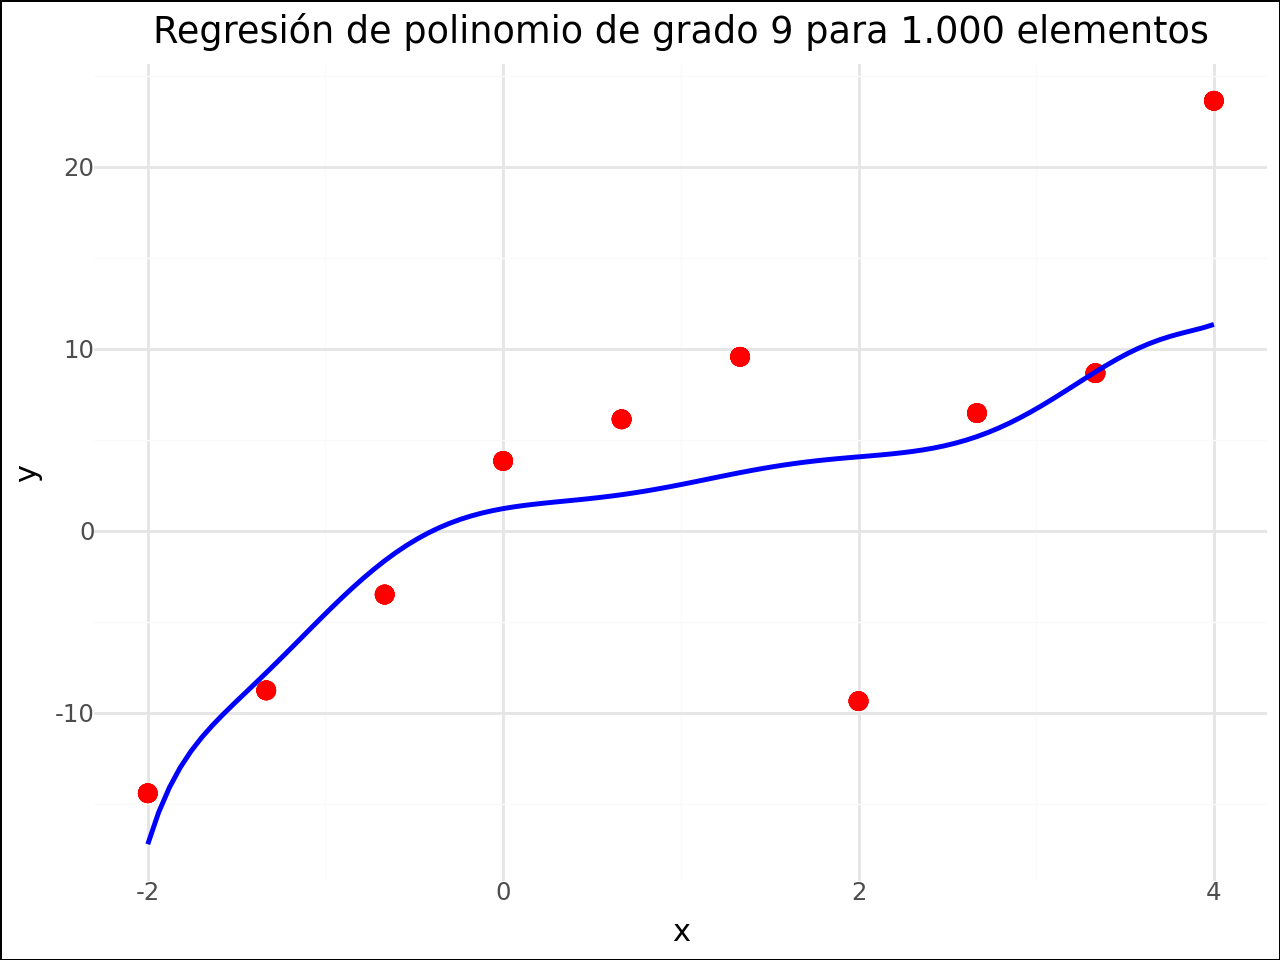

In [4]:
# Semilla para reproducibilidad
np.random.seed(4242)

# Generar 10 valores de x uniformemente distribuidos entre -2 y 4
x = np.linspace(-2, 4, 1000)
epsilon = np.random.normal(0, 6, size=1000)
y = 0.5 * x**3 - 2 * x**2 + 3 * x + 1 + epsilon
df = pd.DataFrame({'x': x, 'y': y})

poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(df[['x']])
model = LinearRegression()
model.fit(X_poly, df['y'])
# Crear rango fino para la curva
x_fit = np.linspace(df['x'].min(), df['x'].max(), 100)
X_fit_poly = poly.transform(pd.DataFrame(x_fit, columns=['x']))
y_fit = model.predict(X_fit_poly)
df_fit = pd.DataFrame({'x': x_fit, 'y_fit': y_fit, 'degree': f'Grado {degree}'})

(
    ggplot() +
    geom_point(df_points, aes(x='x', y='y'), color='red', size=3) +
    geom_line(df_fit, aes(x='x', y='y_fit'), color='blue', size=1) +
    theme_minimal() +
    theme(
        panel_background=element_rect(fill='white'),
        plot_background=element_rect(fill='white')
    ) +
    labs(title='Regresión de polinomio de grado 9 para 1.000 elementos', x='x', y='y')
)

No siempre, se pueden recopilar más datos. Existen una serie de técnicas conocidas como técnicas de regularización que permiten reducir el sobreajuste. No las tratamos en estas lecciones.